In [2]:
import h5py
import sidpy
import pyUSID as usid
import numpy as np
import matplotlib.pyplot as plt

h5_file = h5py.File('data_file.h5')
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [21]:
for k,v in h5_file['Measurement_000'].attrs.items():
    print(k,v)

BE_actual_duration_[s] 0.004
BE_amplitude_[V] 1
BE_auto_smoothing auto smoothing on
BE_band_edge_smoothing_[s] 4832.1
BE_band_edge_trim 0.094742
BE_band_width_[Hz] 200000
BE_bins_per_band 0
BE_center_frequency_[Hz] 1310000
BE_desired_duration_[s] 0.004
BE_phase_content chirp-sinc hybrid
BE_phase_variation 1
BE_points_per_BE_wave 0
BE_repeats 4
FORC_V_high1_[V] 1
FORC_V_high2_[V] 10
FORC_V_low1_[V] -1
FORC_V_low2_[V] -10
FORC_num_of_FORC_cycles 1
FORC_num_of_FORC_repeats 1
File_MDAQ_version MDAQ_VS_090915_01
File_date_and_time 18-Sep-2015 18:32:14
File_file_name SP128_NSO
File_file_path C:\Users\Asylum User\Documents\Users\Agar\SP128_NSO\
File_file_suffix 99
IO_AO_amplifier 10
IO_AO_range_[V] +/- 10
IO_Analog_Input_1 +/- .1V, FFT
IO_Analog_Input_2 off
IO_Analog_Input_3 off
IO_Analog_Input_4 off
IO_DAQ_platform NI 6115
IO_rate_[Hz] 4000000
VS_amplitude_[V] 16
VS_cycle_fraction full
VS_cycle_phase_shift 0
VS_measure_in_field_loops in and out-of-field
VS_mode DC modulation mode
VS_number_o

In [26]:
usid.hdf_utils.find_dataset(h5_file,'Raw_Data')[0]

<HDF5 dataset "Raw_Data": shape (3600, 63360), type "<c8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Piezoresponse (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 165 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	complex64

In [ ]:
grp = h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000']
# 384 -> 96*2*2로 추측됨.
for member in grp:
    print(grp[member])

<HDF5 dataset "Fit": shape (3600, 384), type "|V20">
<HDF5 dataset "Guess": shape (3600, 384), type "|V20">
<HDF5 dataset "Spectroscopic_Indices": shape (3, 384), type "<u4">
<HDF5 dataset "Spectroscopic_Values": shape (3, 384), type "<f4">
<HDF5 dataset "completed_fit_positions": shape (3600,), type "|u1">
<HDF5 dataset "completed_guess_positions": shape (3600,), type "|u1">


In [49]:
for k,v in grp['Spectroscopic_Indices'].attrs.items():
    print(k,v)
print(grp['Spectroscopic_Indices'].shape)

labels [b'DC_Offset' b'Field' b'Cycle']
units [b'V' b'' b'']
(3, 384)


In [69]:
grp['Spectroscopic_Values'][0]

array([  0.       ,   0.       ,   0.6666667,   0.6666667,   1.3333334,
         1.3333334,   2.       ,   2.       ,   2.6666667,   2.6666667,
         3.3333333,   3.3333333,   4.       ,   4.       ,   4.6666665,
         4.6666665,   5.3333335,   5.3333335,   6.       ,   6.       ,
         6.6666665,   6.6666665,   7.3333335,   7.3333335,   8.       ,
         8.       ,   8.666667 ,   8.666667 ,   9.333333 ,   9.333333 ,
        10.       ,  10.       ,  10.666667 ,  10.666667 ,  11.333333 ,
        11.333333 ,  12.       ,  12.       ,  12.666667 ,  12.666667 ,
        13.333333 ,  13.333333 ,  14.       ,  14.       ,  14.666667 ,
        14.666667 ,  15.333333 ,  15.333333 ,  16.       ,  16.       ,
        15.333333 ,  15.333333 ,  14.666667 ,  14.666667 ,  14.       ,
        14.       ,  13.333333 ,  13.333333 ,  12.666667 ,  12.666667 ,
        12.       ,  12.       ,  11.333333 ,  11.333333 ,  10.666667 ,
        10.666667 ,  10.       ,  10.       ,   9.333333 ,   9.3

In [118]:
dc_voltage = grp['Spectroscopic_Values'][0,0::2]

In [119]:
#dtype=[('Amplitude [V]', '<f4'), ('Frequency [Hz]', '<f4'), ('Quality Factor', '<f4'), ('Phase [rad]', '<f4'), ('R2 Criterion', '<f4')])

# grp['Fit'][0]
amp = grp['Fit']['Amplitude [V]']
freq = grp['Fit']['Frequency [Hz]']
q_factor = grp['Fit']['Quality Factor']
phase = grp['Fit']['Phase [rad]']

In [101]:
np.all(amp[0] == [t[0] for t in grp['Fit'][0]])

True

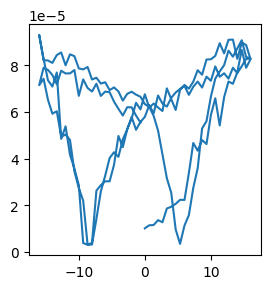

In [114]:
plt.figure(figsize = (3,3))
plt.plot(dc_voltage,amp[0,1::2])

In [19]:
from BGlib.be.analysis.be_loop_fitter import BELoopFitter
import h5py
import BGlib.be as belib

h5_file = h5py.File('data_file_copy.h5','a')

h5_file.h5_pos_inds = h5_file['Measurement_000/Channel_000/Position_Indices']
h5_file.h5_pos_vals = h5_file['Measurement_000/Channel_000/Position_Values']
h5_file.h5_spec_inds = h5_file['Measurement_000/Channel_000/Spectroscopic_Indices']
h5_file.h5_spec_vals = h5_file['Measurement_000/Channel_000/Spectroscopic_Values']

h5_main = belib.analysis.be_sho_fitter.BESHOfitter(h5_file['Measurement_000/Channel_000/Raw_Data'])

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
Group: <HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_001_000" (0 members)> had neither the status HDF5 dataset or the legacy attribute: "last_pixel".

Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (7 members)>]


In [27]:
belib.analysis.be_loop_fitter.BELoopFitter(h5_main.h5_main,'BEPSData','DC modulation mode','full')

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


TypeError: Provided dataset is not a SHO results dataset.

In [31]:
from pyUSID.io.usi_data import USIDataset
USIDataset(h5_main.h5_main)

<HDF5 dataset "Raw_Data": shape (3600, 63360), type "<c8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Piezoresponse (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 165 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	complex64

In [36]:
del h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000']

In [39]:
import sidpy
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices


In [40]:
h5_main = belib.analysis.be_sho_fitter.BESHOfitter(h5_file['Measurement_000/Channel_000/Raw_Data'])

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


In [48]:
belib.analysis.be_loop_fitter.BELoopFitter(h5_main.h5_main,'BEPSData','DC modulation mode','full')

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


TypeError: Provided dataset is not a SHO results dataset.

In [55]:
h5_main.set_up_guess()

In [56]:
h5_main.do_guess()

	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 finished parallel computation
Rank 0 - 26% complete. Time remaining: 5.21 mins
Rank 0 finished parallel computation
Rank 0 - 52% complete. Time remaining: 4.32 mins
Rank 0 finished parallel computation
Rank 0 - 78% complete. Time remaining: 2.11 mins
Rank 0 finished parallel computation
Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 dataset "Guess": shape (3600, 384), type "|V40">
located at: 
	/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess 
Data contains: 
	SHO (compound) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Fields:
	Amplitude [V], Frequency [Hz], Quality Factor, Phase [rad], R2 Criterion

In [57]:
h5_main.set_up_fit()


Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000" (4 members)>]


c:\test_pycroscopy\bglib\BGlib\be\analysis\fitter.py:140: UserWarning: status dataset not created yet
  warn('status dataset not created yet')


In [58]:
h5_main.do_fit()

c:\test_pycroscopy\bglib\BGlib\be\analysis\fitter.py:140: UserWarning: status dataset not created yet
  warn('status dataset not created yet')


Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 22% complete. Time remaining: 4.11 mins
Rank 0 - 44% complete. Time remaining: 3.27 mins
Rank 0 - 67% complete. Time remaining: 1.97 mins
Rank 0 - 89% complete. Time remaining: 36.35 sec
Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 dataset "Fit": shape (3600, 384), type "|V40">
located at: 
	/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit 
Data contains: 
	SHO (compound) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Fields:
	Amplitude [V], Frequency [Hz], Quality Factor, Phase [rad], R2 Criterion

In [63]:
import h5py
h5_file = h5py.File('data_file_copy.h5','r+')
h5_file

<HDF5 file "data_file_copy.h5" (mode r+)>

In [ ]:
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [69]:
loop_fitter  = BELoopFitter(h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit'],'BEPSData','DC modulation mode','full')

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


In [75]:
loop_fitter.do_guess()

	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 dataset "Guess": shape (3600, 4), type "|V80">
located at: 
	/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Guess 
Data contains: 
	Metrics (compound) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Field - size: 2 
	Cycle - size: 2
Data Fields:
	a_0, a_1, a_2, a_3, a_4, b_0, b_1, b_2, b_3, R2 Criterion

In [78]:
loop_fitter.set_up_fit()


Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (6 members)>]


c:\test_pycroscopy\bglib\BGlib\be\analysis\fitter.py:140: UserWarning: status dataset not created yet
  warn('status dataset not created yet')
c:\test_pycroscopy\bglib\BGlib\be\analysis\utils\be_loop.py:497: RuntimeWarning: invalid value encountered in divide
  nuc_v01a = bnv[2] * erfinv((nuc_threshold * bnv[2] + nuc_threshold * bnv[3] - bnv[2]) / bnv[2]) + anv[3]
c:\test_pycroscopy\bglib\BGlib\be\analysis\utils\be_loop.py:498: RuntimeWarning: invalid value encountered in divide
  nuc_v01b = bnv[3] * erfinv((nuc_threshold * bnv[2] + nuc_threshold * bnv[3] - bnv[2]) / bnv[3]) + anv[3]
c:\test_pycroscopy\bglib\BGlib\be\analysis\utils\be_loop.py:503: RuntimeWarning: invalid value encountered in divide
  nuc_v02a = bnv[0] * erfinv(((1 - nuc_threshold) * bnv[0] + (1 - nuc_threshold) * bnv[1] - bnv[0]) / bnv[0]) + anv[2]
c:\test_pycroscopy\bglib\BGlib\be\analysis\utils\be_loop.py:504: RuntimeWarning: invalid value encountered in divide
  nuc_v02b = bnv[1] * erfinv(((1 - nuc_threshold) * bnv[

In [79]:
loop_fitter.compute(override=True)

c:\test_pycroscopy\bglib\BGlib\be\analysis\fitter.py:140: UserWarning: status dataset not created yet
  warn('status dataset not created yet')


Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:888: UserWarning: A dataset named: Fit_Loop_Parameters already exists in group: /Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))


<HDF5 dataset "Fit": shape (3600, 4), type "|V80">
located at: 
	/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Fit 
Data contains: 
	Metrics (compound) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Field - size: 2 
	Cycle - size: 2
Data Fields:
	a_0, a_1, a_2, a_3, a_4, b_0, b_1, b_2, b_3, R2 Criterion

In [ ]:
# 실수로 raw data를 fitter시켜야하는데 SHO fit된 데이터에 loop fitter 적용했다...
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Fit-Loop_Fit_000
        ----------------
        ├ Fit
        ├ Fit_Loop_Parameters
        ├ Guess
        ├ Guess_Loop_Parameters
        ├ Loop_Metrics
        ├ Loop_Metrics_Indices
        ├ Loop_Metrics_Values
        ├ Projected_Loops
        ├ completed_fit_positions
        ├ completed_guess_positions
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ 

In [84]:
h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Projected_Loops']

<HDF5 dataset "Projected_Loops": shape (3600, 384), type "<f8">

In [87]:
h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000']['Spectroscopic_Values'][0].shape

(384,)

In [88]:
loop_data = h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Projected_Loops'][0]
voltage = h5_file['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000']['Spectroscopic_Values'][0]

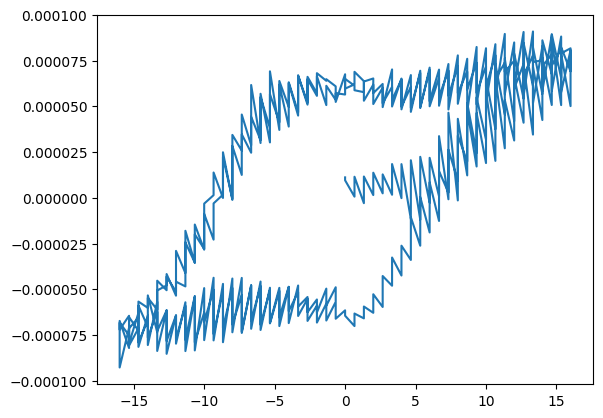

In [90]:
import matplotlib.pyplot as plt

plt.plot(voltage,loop_data)

In [101]:
for k,v in h5_file['Measurement_000/Channel_000/Raw_Data'].attrs.items():
    print(k,v)

Bin_FFT <HDF5 object reference>
Bin_Frequencies <HDF5 object reference>
Bin_Indices <HDF5 object reference>
Bin_Step <HDF5 object reference>
Bin_Wfm_Type <HDF5 object reference>
Excitation_Waveform <HDF5 object reference>
Noise_Floor <HDF5 object reference>
Position_Indices <HDF5 object reference>
Position_Values <HDF5 object reference>
Spectroscopic_Indices <HDF5 object reference>
Spectroscopic_Values <HDF5 object reference>
UDVS <HDF5 object reference>
UDVS_Indices <HDF5 object reference>
in_field_Plot_Group <HDF5 region reference>
out_of_field_Plot_Group <HDF5 region reference>
quantity Piezoresponse
units V


In [ ]:
import pyUSID as usid
raw_data = usid.io.usi_data.USIDataset(h5_file['Measurement_000/Channel_000/Raw_Data'])
dir(raw_data)

['_USIDataset__curr_ndim_form',
 '_USIDataset__get_anc_labels',
 '_USIDataset__lazy_2d',
 '_USIDataset__n_dim_data_orig',
 '_USIDataset__n_dim_data_s2f',
 '_USIDataset__n_dim_form_avail',
 '_USIDataset__n_dim_sort_order_orig_f2s',
 '_USIDataset__n_dim_sort_order_orig_s2f',
 '_USIDataset__orig_n_dim_labs',
 '_USIDataset__orig_n_dim_sizes',
 '_USIDataset__orig_pos_dim_labels',
 '_USIDataset__orig_pos_dim_sizes',
 '_USIDataset__orig_spec_dim_labels',
 '_USIDataset__orig_spec_dim_sizes',
 '_USIDataset__pos_sort_order',
 '_USIDataset__set_labels_and_sizes',
 '_USIDataset__set_n_dim_view',
 '_USIDataset__slice_n_dim_form',
 '_USIDataset__sort_dims',
 '_USIDataset__spec_sort_order',
 '_USIDataset__validate_slice_dict',
 '__array__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '

No position datasets found as attributes of /Measurement_000/Channel_000/Spectroscopic_Values
X,Y ,1229.4923095703125,1389.6485595703125,0,384
X,Y ,1229.4923095703125,1389.6485595703125,0,384


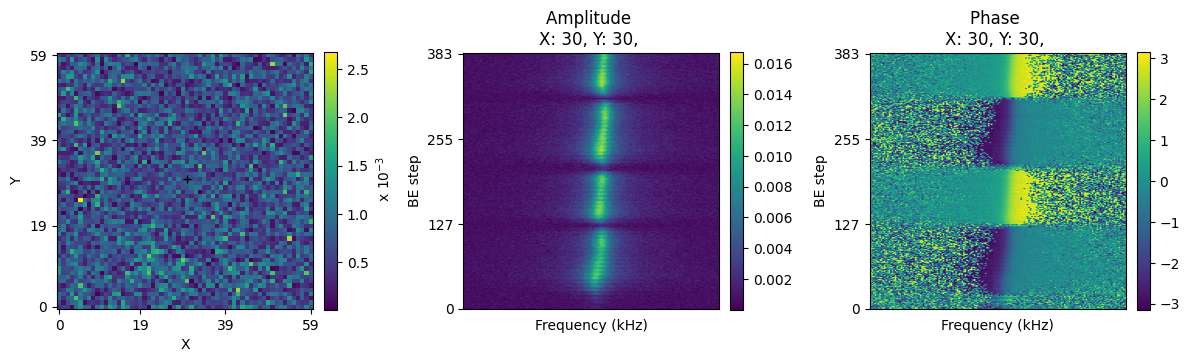

interactive(children=(IntSlider(value=0, description='Step', max=63360), Output()), _dom_classes=('widget-inte…

In [131]:
fig = belib.viz.be_viz_utils.jupyter_visualize_be_spectrograms(raw_data)

In [132]:
def plot_line_family(axis, x_vec, line_family, line_names=None, label_prefix='', label_suffix='',
                     y_offset=0, show_cbar=False, **kwargs):
    """
    Plots a family of lines with a sequence of colors


    Parameters
    ----------
    axis : matplotlib.axes.Axes object
        Axis to plot the curve
    x_vec : array-like
        Values to plot against
    line_family : 2D numpy array
        family of curves arranged as [curve_index, features]
    line_names : array-like
        array of string or numbers that represent the identity of each curve in the family
    label_prefix : string / unicode
        prefix for the legend (before the index of the curve)
    label_suffix : string / unicode
        suffix for the legend (after the index of the curve)
    y_offset : (optional) number
        quantity by which the lines are offset from each other vertically (useful for spectra)
    show_cbar : (optional) bool
        Whether or not to show a colorbar (instead of a legend)

    """

    x_vec = np.array(x_vec)
    #assert x_vec.ndim == 1, 'x_vec must be a 1D array'
    if not isinstance(line_family, list):
        line_family = np.array(line_family)

    assert line_family.ndim == 2, 'line_family must be a 2D array'
    #    assert x_vec.shape[1] == line_family.shape[1], \
    #        'The size of the 2nd dimension of line_family must match with of x_vec, but line fam has shape {} whereas xvec has shape {}'.format(line_family.shape, x_vec.shape)
    num_lines = line_family.shape[0]


    if line_names is None:
        # label_prefix = 'Line '
        line_names = [str(line_ind) for line_ind in range(num_lines)]

    line_names = ['{} {} {}'.format(label_prefix, cur_name, label_suffix) for cur_name in line_names]

    print("Line family shape is {}".format(line_family.shape))

    for line_ind in range(num_lines):
        colors = plt.cm.get_cmap('jet', line_family.shape[-1])
        axis.plot(x_vec, line_family[line_ind] + line_ind * y_offset,
                  color = colors(line_ind),
                  )

    if show_cbar:
        # put back the cmap parameter:
        kwargs.update({'cmap': cmap})
        _ = cbar_for_line_plot(axis, num_lines, **kwargs)

In [133]:
h5_sho_fit = raw_data

In [ ]:
# 2/26일에 할 때 뒤집어서 나오던 것 제대로 출력된다
Nd_mat = h5_sho_fit.get_n_dim_form()
Nd_mat.shape

(60, 60, 165, 96, 2, 2)